<a href="https://colab.research.google.com/github/Tran-Thu-Le/share/blob/main/ML/Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminar: Lasso problem

**Speaker:** [Tran Thu Le][1]

University of Rennes 1, France

Rennes, France, 2021-09-06

[1]: https://github.com/Tran-Thu-Le

## Problem definition

### Motivation

**Model.** We are given an "observation" $y\in \mathbb R^m$ being a noisy combination of "atoms" $a_i\in \mathbb R^m$ with positive coefficients $x_i\in \mathbb R$ for $i=1,...,n$, i.e.
    $$y=x_1a_1 + ... + x_na_n +\varepsilon,$$
    where $\varepsilon\in \mathbb R^m$ represents the noise.

**Question.** Assume that $y$ and $a_i$, $i=1,...,n$ were known. The question is how to recover $x_i$, $i=1,..., n$.

**Challenge.** The problem is not easy even in the case $\varepsilon=0_{\mathbb R^m}$. Indeed, the problem tends to be redundant as soon as $m\neq n$.

#### Example 1. Ordinary Least Square



Assume that $y=xa+\varepsilon$ for $y, a, \varepsilon\in \mathbb R^m$ and $x>0$. The relation between $y$ and $a$ is represented by the following plot. Our question is how to find the "slope" $x$.

A popular approach for this problem is to solve the following problem, called [Ordinary Least Square (OLS)][2] problem,
$$\min_{x\in \mathbb R, x>0} ||y-xa||_2^2$$

[2]: https://en.wikipedia.org/wiki/Ordinary_least_squares

**Application.** OLS problem is one of the main problem in statistics.

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme()
from math import pi

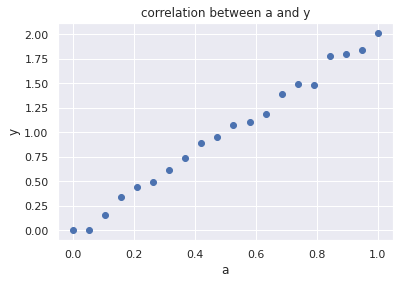

In [11]:
a = np.linspace(0., 1., 20) 
noise = 0.2*(np.random.rand(20)-0.5)
y = 2*a+noise
plt.scatter(a, y)
plt.title("correlation between a and y")
plt.xlabel("a")
plt.ylabel("y")
plt.show()

#### Example 2. Fourier series

**Model.** Let $a_k\in \mathbb R^m$ the $m$-discretize of function $\sin(k2\pi. t)$ for $t\in [0, 1]$. Now, assume that 
$$y = a_2+a_3 +\varepsilon$$

The following plot displays the graphs of $y, a_2$ and $a_3$ wrt $m=100$.

Notice that the problem of decomposing $y$ into sine functions is indeed the Fourier expansion if $\varepsilon=0$.

For $\varepsilon\neq 0$, the Fourier expansion is unapplicable.

**Application.** This problem is one of the main problem in Signal processing.

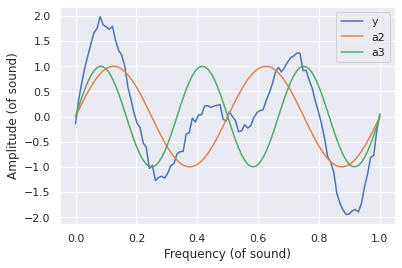

In [28]:
m=100
t = np.linspace(0., 1., m)
noise = 0.3*(np.random.rand(m)-0.5)
a2 = np.sin(t*2*pi*2)
a3 = np.sin(t*2*pi*3)
y = a1 + a2 + noise
plt.plot(t, y, label="y")
plt.plot(t, a2, label="a2")
plt.plot(t, a3, label="a3")
plt.legend()
plt.xlabel("Frequency (of sound)")
plt.ylabel("Amplitude (of sound)")
plt.show()

### Solution approachs

**Solution approach 1 (naive):** is to consider the [Multiple Linear Regression (MLR)][3] problem,
$$\min_{ x\in \mathbb R^m} ||y-\sum_{i=1}^n x_ia_i||_2^2$$

However, in pratice this problem is uasually [ill-pose][4], i.e., its optimal solution can be
- not unique
- unstable wrt noise

To avoid the ill-poseness of MLR, we may use [Tikhonov regularizations][5] using $\ell_0, \ell_2 and \ell_1$.


**$\ell_0$ regularization (extremely difficult):** is to consider $\ell_0$ penalization
$$\min_{ x\in \mathbb R^m} ||y-\sum_{i=1}^n x_ia_i||_2^2 + \lambda ||x||_0$$
where $\lambda>0$ and $||x||_0$ counting the non-zero entries, a.k.a Hamming distance. This problem is extremely diffcult since it is non-convex and even NP-hard. 

**Ridge: $\ell_2$ regularization (quite good):** is to consider $\ell_2$ penalization
$$\min_{ x\in \mathbb R^m} ||y-\sum_{i=1}^n x_ia_i||_2^2 + \lambda ||x||_2$$
This problem is convex and have an explicit solution. However, in practice most of components of $x$ are non-zero while we wish most of them equal to $0$.

**Lasso: $\ell_1$ regularization (good):** is to consider $\ell_1$ penalization
$$\min_{ x\in \mathbb R^m} ||y-\sum_{i=1}^n x_ia_i||_2^2 + \lambda ||x||_1$$
Although this problem is non-smooth but convex, thus has many solving methods.

**Note.** If $m$ or $n$ is fixed, then Lasso can be solve in polynomial time. However, it is not to known to be NP-hard or not in general.





[3]: https://en.wikipedia.org/wiki/Linear_regression#*Simple_and_multiple_linear_regression*
[4]: https://en.wikipedia.org/wiki/Well-posed_problem
[5]: https://en.wikipedia.org/wiki/Tikhonov_regularization

### Advantages of Lasso


The $\ell_1$ induces the spasity, thus perform both the feature selection and spasity.


![Lasso and Ridge](https://scientistcafe.com/ids/images/LassoRidge.png)

**Dual problem of Lasso.**
$$\max_{u\in D} \frac{1}{2}||y||_2^2-\frac{1}{2}||y-u||_2^2$$

where $D=\{ u\in \mathbb R^m: u^Ta_i\leq \lambda, \forall i=1,...,n\}$. Hence the dual problem of Lasso is actually the projection of $y$ onto convex set $D$, thus has a unique dual solution, say $u^*$.

**Optimality condition.** $x^*\in \mathbb R^n$ is an optimal solution (not unique) of Lasso iff there exists $\hat u\in \mathbb R^m$ such that
$$\begin{cases}
(\hat u)^Ta_i=\lambda, \text{ if } x^*_i>0,\\
(\hat u)^Ta_i<\lambda, \text{ if } x^*_i=0.
\end{cases}
$$
Moreover, $\hat u$ is the dual optimal solution.

### ISTA a fast solving method

The idea of solving Lasso contains two main steps

**Upper bound function**

$$\begin{align}
||y-Ax||^2&=||y||^2-2\langle y, Ax\rangle+||Ax||^2\\
&\leq ||y||^2-2\langle A^Ty, x\rangle+\gamma||x||^2
\end{align}$$

Thus instead of solving
$$\min_{x\in \mathbb R^m}
\frac{1}{2}||y-Ax||_2^2+\lambda||x||_1$$


we may solve
$$
\begin{align}
& \min_{x\in \mathbb R^m}
\frac{1}{2}||x-\frac{1}{\gamma} A^Ty||_2^2+\lambda ||x||_1 +\frac{1}{2\gamma}||y||_2^2-\frac{1}{2\gamma^2} ||A^Ty||_2^2\\
= & \min_{x\in \mathbb R^m}
\frac{1}{2}||x-\frac{1}{\gamma} A^Ty||_2^2+\lambda ||x||_1 
\end{align}$$